# Кубические сплайны

$\textbf{Кубический сплайн}$ (дефекта 1), интерполирующий $f(x)$ на $[a, b]$: $$c(x) := a_k + b_k (x-x_k) + c_k (x-x_k)^2 + d_k (x-x_k)^3,$$ где $x\in [x_{k-1}, x_{k}] \big|_{k=1}^n$ 

$\textbf{Обозначение кубического сплайна}$: $S^N_{3,2}$, где $N, 3, 2$ - кол-во узлов интерполирования, старшая степень и порядок гладкости сплайна соответственно.
$\textbf{Дефект сплайна}$ - разность между старшей степерью и порядком гладкости сплайна. В нашей задаче дефект равен $1$

$\textbf{Краевые условия}$: 
$$ \textbf{1)}\; c(x_k) = f(x_k), \;\; \textbf{2)}\; c(x) \in C^2([a,b]), \;\; \textbf{3)}\; c''(a) = c''(b)=0$$
При выполнении условия $\textbf{3)}$ сплайн называется $\textbf{естественным}$.

$$\textbf{1)}\;y_i := c_{i-1}(x_i)=c_{i}(x_i),\; \textbf{2)}\; y'_i :=c'_{i-1}(x_i)=c'_{i}(x_i),\; \textbf{3)}\; y''_i :=c''_{i-1}(x_i)=c''_{i}(x_i), \; i=\overline{2,n-1}$$
$c_i(x)$ - кубический полином $\Rightarrow c''_i(x)$ - $\textbf{линейная функция}$:

$c''_i(x) = c''_i(x_i)+\dfrac{x-x_i}{h_i} \left( c''_i(x_{i+1}) - c''_i(x_I)\right), \; h_i := x_{i+1}-x_i$

$$c'_i(x) = c'_i(x_i) + \int_{x_i}^x c''_i(t) dt = c'_i(x_i) + c''_i(x_i)(x-x_i) + \dfrac{c''_i(x_{i+1})-c''_i(x_i)}{2h_i}(x-x_i)^2 $$
$$c_i(x) = c_i(x_i) + \int_{x_i}^x c'_i(t) dt = c_i(x_i) + c'_i(x_i)(x-x_i) + c''_i(x_i)\dfrac{(x-x_i)^2}{2} + \dfrac{c''_i(x_{i+1})-c''_i(x_i)}{6h_i}(x-x_i)^3$$

In [102]:
import numpy as np
import matplotlib.pyplot as plt 
np.set_printoptions(suppress=True)

In [103]:
# Матрица в виде AB = C  
# Исходная функция
def fn(x):
    return x**2 + 4*np.sin(x) - 2

In [104]:
a = float(input('Введите левую границу a: '))
b = float(input('Введите правую границу b: '))
m = int(input('Введите кол-во равноотстоящих узлов m (целое число): '))

x = np.linspace(a, b, m)

# m - число узлов
# n - число квадратичных сплайнов, у каждого 3 неизвестных - значит, у нас 3*n неизвестных
# Надо решить 3*n уравнения
n = m - 1


A = np.zeros((4*n, 4*n))*1.0
C = np.zeros(4*n)*1.0

for i in range(n):
    A[i,i] = x[i]**3
    A[i,n+i] = x[i]**2
    A[i,2*n+i] = x[i]
    A[i,3*n+i] = 1
    
    # Строки [n, 2n-1]
    A[n+i, i] = x[i+1]**3
    A[n+i, n+i] = x[i+1]**2
    A[n+i, 2*n+i] = x[i+1]
    A[n+i, 3*n+i] = 1

    
    C[i] = fn(x[i])
    C[n+i] = fn(x[i+1])

# Строки [2n, 3n-1]
for j in range(n-1):
    row = 2*n+j
    columns = [j, j+1, n+j, n+j+1, 2*n+j, 2*n+j+1]
    #start at j+1 since derivatives are equal at the interior points
    values = 3*x[j+1]**2, -3*x[j+1]**2, 2*x[j+1], -2*x[j+1], 1, -1
    A[row, [columns]] = values
   
    # Значения функции для рядов C из промежутка [2n: 3n-1] равны нулю, поскольку мы приравниваем произвдоные

    # Строки [3n-1, 4n-2]
for q in range(n-1):
    row = 3*n-1 + q
    columns = [q, q+1, n+q, n+q+1]
    values = 6*x[q+1], -6*x[q+1], 2, -2
    A[row, [columns]] = values
    # Значения функции для рядов C из промежутка [3n-1: 4n-2] равны нулю, поскольку мы приравниваем произвдоные
    
# Задаем вторые производные на граничны точках (x0, xn) равными нулю, 
# чтобы получить два дополнительных уравнения - естественный сплайн
A[4*n-2, [0,n]] = 6*x[0], 2
A[4*n-1, [n-1,2*n-1]] =  6*x[n], 2 #6*x[n-1], 2

# Решаем относительно b
B = np.linalg.solve(A,C)

ai = B[:n]
bi = B[n:2*n]
ci = B[2*n:3*n]
di = B[3*n:]

Введите левую границу a: -10
Введите правую границу b: 10
Введите кол-во равноотстоящих узлов m (целое число): 10


## Визуализируем

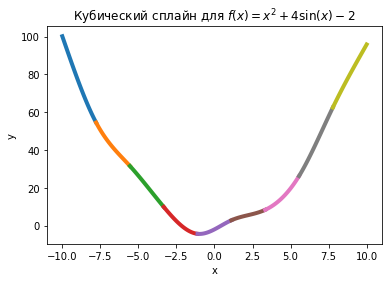

In [105]:
plt.figure()

for k in range(n):
    xspline = np.linspace(x[k], x[k+1])
    yspline = ai[k]*xspline**3 + bi[k]*xspline**2 + ci[k]*xspline + di[k]    
    plt.plot(xspline, yspline, '-', linewidth=4)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубический сплайн для $f(x) = x^2 + 4 \sin(x) - 2$')

plt.show()

In [106]:
# result = 0
# for t in range(n):
#     upper_lim = (ai[t]*(x[t+1]**4)/4) + (bi[t]*(x[t+1]**3)/3) + ci[t]*(x[t+1]**2)/2 + di[t]*x[t+1]
#     lower_lim = (ai[t]*(x[t]**4)/4) + (bi[t]*(x[t]**3)/3) + ci[t]*(x[t]**2)/2 + di[t]*x[t]
    
#     result += ((upper_lim - lower_lim))
    
# print(result)

## Кубические сплайны по оптимальным узлам Чебышева

In [107]:
# m - число узлов
# n - число кубических сплайнов
# n сплайнов, у каждого 3 неизвестных, итого 3*n неизвестных
# Значит, нужно решить 3*n уравнений
n = m - 1

chebish = []
for i in range(0, m):
    chebish.append(0.5 * ((b-a)*np.cos(((2*i+1)*np.pi)/(2*(m+1))) + (b+a)))
    

A_opt = np.zeros((4*n, 4*n))*1.0
C_opt = np.zeros(4*n)*1.0

for i in range(n):
    A_opt[i,i] = chebish[i]**3
    A_opt[i,n+i] = chebish[i]**2
    A_opt[i,2*n+i] = chebish[i]
    A_opt[i,3*n+i] = 1
    
    # Строки [n, 2n-1]
    A_opt[n+i, i] = chebish[i+1]**3
    A_opt[n+i, n+i] = chebish[i+1]**2
    A_opt[n+i, 2*n+i] = chebish[i+1]
    A_opt[n+i, 3*n+i] = 1

    
    C_opt[i] = fn(chebish[i])
    C_opt[n+i] = fn(chebish[i+1])

# Строки [2n, 3n-1]
for j in range(n-1):
    row = 2*n+j
    columns = [j, j+1, n+j, n+j+1, 2*n+j, 2*n+j+1]
    # start at j+1 since derivatives are equal at the interior points
    values = 3*chebish[j+1]**2, -3*chebish[j+1]**2, 2*chebish[j+1], -2*chebish[j+1], 1, -1
    A_opt[row, [columns]] = values
   
    # Значения функции для рядов C из промежутка [2n: 3n-1] равны нулю, поскольку мы приравниваем произвдоные

    # Строки [3n-1, 4n-2]
for q in range(n-1):
    row = 3*n-1 + q
    columns = [q, q+1, n+q, n+q+1]
    values = 6*chebish[q+1], -6*chebish[q+1], 2, -2
    A_opt[row, [columns]] = values
    # Значения функции для рядов C из промежутка [3n-1: 4n-2] равны нулю, поскольку мы приравниваем произвдоные
    
# Задаем вторые производные на граничны точках (x0, xn) равными нулю, 
# чтобы получить два дополнительных уравнения - естественный сплайн
A_opt[4*n-2, [0,n]] = 6*chebish[0], 2
A_opt[4*n-1, [n-1,2*n-1]] =  6*chebish[n], 2

# Решаем относительно b
B_opt = np.linalg.solve(A_opt, C_opt)

ai_opt = B_opt[:n]
bi_opt = B_opt[n:2*n]
ci_opt = B_opt[2*n:3*n]
di_opt = B_opt[3*n:]

## Визуализация сплайна $S^m_{3,2}$ по оптимальным узлам Чебышева

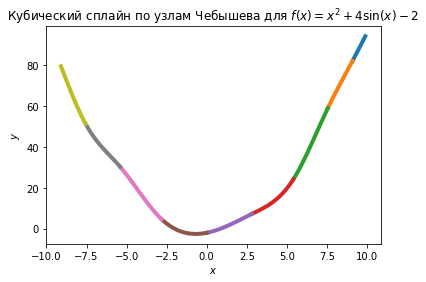

In [108]:
plt.figure()

for k in range(n):
    xspline_opt = np.linspace(chebish[k], chebish[k+1])
    yspline_opt = ai_opt[k]*xspline_opt**3 + bi_opt[k]*xspline_opt**2 + ci_opt[k]*xspline_opt + di_opt[k]    
    plt.plot(xspline_opt, yspline_opt, '-', linewidth=4)

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Кубический сплайн по узлам Чебышева для $f(x) = x^2 + 4 \sin(x) - 2$')

plt.show()

## Визуализация сплайна $S^m_{3,2}$ по оптимальным узлам Чебышева + по равноотстающим

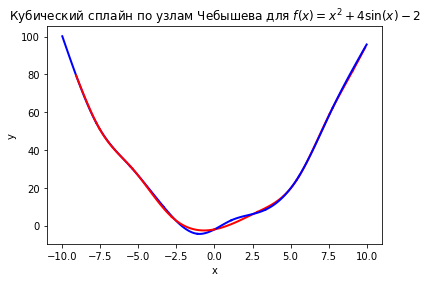

In [112]:
plt.figure()

for k in range(n):
    xspline_opt = np.linspace(chebish[k], chebish[k+1])
    yspline_opt = ai_opt[k]*xspline_opt**3 + bi_opt[k]*xspline_opt**2 + ci_opt[k]*xspline_opt + di_opt[k]     
    xspline = np.linspace(x[k], x[k+1])
    yspline = ai[k]*xspline**3 + bi[k]*xspline**2 + ci[k]*xspline + di[k] 
    
    plt.plot(xspline_opt, yspline_opt, 'r', linewidth=2)
    plt.plot(xspline, yspline, 'b', linewidth=2)
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубический сплайн по узлам Чебышева для $f(x) = x^2 + 4 \sin(x) - 2$')
plt.show()